# AI 모델 구축

## 모델 설계

In [2]:
def Conv_AE(input_data):
  model = Sequential()
  model.add(Input(shape=(input_data.shape[1],	input_data.shape[2])))
  model.add(Conv1D(filters=64,	kernel_size=input_data.shape[1]	//64,	padding='same',	strides=2,	activation='relu'))
  model.add(Conv1D(filters=32,	kernel_size=input_data.shape[1]	//64,	padding='same',	activation='relu'))
  model.add(Conv1DTranspose(filters=64,	kernel_size=input_data.shape[1]	//64,	padding='same',	strides=2, activation='relu'))
  model.add(Conv1DTranspose(filters=1,	kernel_size=input_data.shape[1]	//64,	padding='same'))
  return model

### 진동 모델 설계

In [3]:
vib_model = Conv_AE(vib_train_dataset)
vib_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 256, 64)        │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 256, 32)        │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose                │ (None, 512, 64)        │        16,448 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_1              │ (None, 512, 1)         │           513 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,953 (132.63 KB)

 Trainable params: 33,953 (132.63 KB)

 Non-trainable params: 0 (0.00 B)

### 전류 모델 설계

In [4]:
cur_model	=	Conv_AE(cur_train_dataset)
cur_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 512, 64)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 512, 32)        │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_2              │ (None, 1024, 64)       │        32,832 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_3              │ (None, 1024, 1)        │         1,025 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,745 (264.63 KB)

 Trainable params: 67,745 (264.63 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 학습

### 진동 모델 학습

In [5]:
es = EarlyStopping(monitor='val_loss', patience=10)

vib_model.compile(loss='mae', optimizer='adam')
vib_history = vib_model.fit(x=vib_train_dataset, y=vib_train_dataset, epochs=100, validation_split=0.2, callbacks=[es])

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.4370 - val_loss: 0.0695
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0588 - val_loss: 0.0438
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - val_loss: 0.0350
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - val_loss: 0.0296
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - val_loss: 0.0380
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - val_loss: 0.0348
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0362 - val_loss: 0.0291
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0254 - val_loss: 0.0261
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0256 - val_loss: 0.0503
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - val_loss: 0.0264
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - val_loss: 0.0225
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

### 전류 모델 학습

In [6]:
es = EarlyStopping(monitor='val_loss', patience=10)

cur_model.compile(loss='mae', optimizer='adam')
cur_history = cur_model.fit(x=cur_train_dataset, y=cur_train_dataset, epochs=100, validation_split=0.2, callbacks=[es])

Epoch 1/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1630 - val_loss: 0.0314
Epoch 2/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0359 - val_loss: 0.0221
Epoch 3/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0223 - val_loss: 0.0151
Epoch 4/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0257 - val_loss: 0.0154
Epoch 5/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0340 - val_loss: 0.0184
Epoch 6/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0234 - val_loss: 0.0546
Epoch 7/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0316 - val_loss: 0.0399
Epoch 8/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0219 - val_loss: 0.0275
Epoch 9/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0282 - val_loss: 0.0093
Epoch 10/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0180 - val_loss: 0.0150
Epoch 11/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0189 - val_loss: 0.0158
Epoch 12/100
205/205 ━━━━━━━━━━━━━━━━━━━

#### 학습 결과

In [7]:
vib_history.history['loss']

[0.26746711134910583,
 0.04955519735813141,
 0.03748578205704689,
 0.03448691591620445,
 0.04179626330733299,
 0.03825116902589798,
 0.03308828920125961,
 0.0241018645465374,
 0.028105000033974648,
 0.03592587262392044,
 0.021216409280896187,
 0.025575613602995872,
 0.028772685676813126,
 0.02252146229147911,
 0.028237946331501007,
 0.02706454135477543,
 0.02152000367641449,
 0.037064746022224426,
 0.018950559198856354,
 0.026413636282086372,
 0.023802978917956352,
 0.01834910549223423,
 0.024877630174160004,
 0.021267712116241455,
 0.020142916589975357,
 0.020475702360272408,
 0.020587744191288948,
 0.0188741572201252,
 0.020429756492376328,
 0.019239481538534164,
 0.02035362273454666,
 0.021222691982984543,
 0.016519838944077492,
 0.020438047125935555,
 0.01594260148704052,
 0.024594733491539955,
 0.015829993411898613,
 0.016514070332050323]

In [8]:
vib_history.history['val_loss']

[0.0694950520992279,
 0.04378591850399971,
 0.034959033131599426,
 0.0295917559415102,
 0.037977080792188644,
 0.034758470952510834,
 0.02908041514456272,
 0.02605011872947216,
 0.05025127902626991,
 0.02639727108180523,
 0.022528059780597687,
 0.025059225037693977,
 0.027918171137571335,
 0.021387876942753792,
 0.035780325531959534,
 0.03310614824295044,
 0.04866434261202812,
 0.02594119869172573,
 0.030297869816422462,
 0.024453014135360718,
 0.030086295679211617,
 0.016729041934013367,
 0.020915785804390907,
 0.024861961603164673,
 0.020495491102337837,
 0.023068564012646675,
 0.04281714931130409,
 0.013824785128235817,
 0.018292415887117386,
 0.0230367761105299,
 0.033727873116731644,
 0.01470218226313591,
 0.015215889550745487,
 0.02194243296980858,
 0.022413404658436775,
 0.014673065394163132,
 0.01839190535247326,
 0.024210602045059204]

In [9]:
cur_history.history['loss']

[0.08229074627161026,
 0.03106016106903553,
 0.025086792185902596,
 0.03002120368182659,
 0.024578021839261055,
 0.026629384607076645,
 0.02523985132575035,
 0.01821850799024105,
 0.02794688567519188,
 0.021823348477482796,
 0.01984225958585739,
 0.014075621962547302,
 0.016096075996756554,
 0.014446386136114597,
 0.01659339666366577,
 0.02039536088705063,
 0.015528945252299309,
 0.016046544536948204,
 0.014520209282636642,
 0.012880222871899605,
 0.01896047219634056,
 0.012267696671187878,
 0.011059186421334743,
 0.012676948681473732,
 0.011311078444123268,
 0.017425529658794403,
 0.009521105326712132,
 0.012362176552414894,
 0.012211340479552746,
 0.015639860183000565,
 0.013269319199025631,
 0.00891698244959116,
 0.00981561653316021,
 0.012545750476419926,
 0.014366621151566505,
 0.011934110894799232,
 0.009908685460686684,
 0.015433096326887608,
 0.011340975761413574,
 0.009908071719110012,
 0.011797481216490269,
 0.012484910897910595]

In [11]:
cur_history.history['val_loss']

[0.031412385404109955,
 0.022114485502243042,
 0.01506105624139309,
 0.015418494120240211,
 0.018428679555654526,
 0.05461752414703369,
 0.039907895028591156,
 0.027493463829159737,
 0.009313390590250492,
 0.014962195418775082,
 0.015809398144483566,
 0.013446602039039135,
 0.039417579770088196,
 0.012132220901548862,
 0.016523361206054688,
 0.01797851361334324,
 0.01345894206315279,
 0.008215880952775478,
 0.015208864584565163,
 0.01473216898739338,
 0.022177597507834435,
 0.014674031175673008,
 0.011503633111715317,
 0.011475886218249798,
 0.007422797381877899,
 0.011022127233445644,
 0.010364780202507973,
 0.008107023313641548,
 0.015504182316362858,
 0.010345520451664925,
 0.008221146650612354,
 0.005444749724119902,
 0.006032443139702082,
 0.016531959176063538,
 0.018312877044081688,
 0.009447630494832993,
 0.015392226167023182,
 0.016831204295158386,
 0.01408375147730112,
 0.0301221776753664,
 0.008068122901022434,
 0.010517233982682228]

진동 데이터 학습 결과

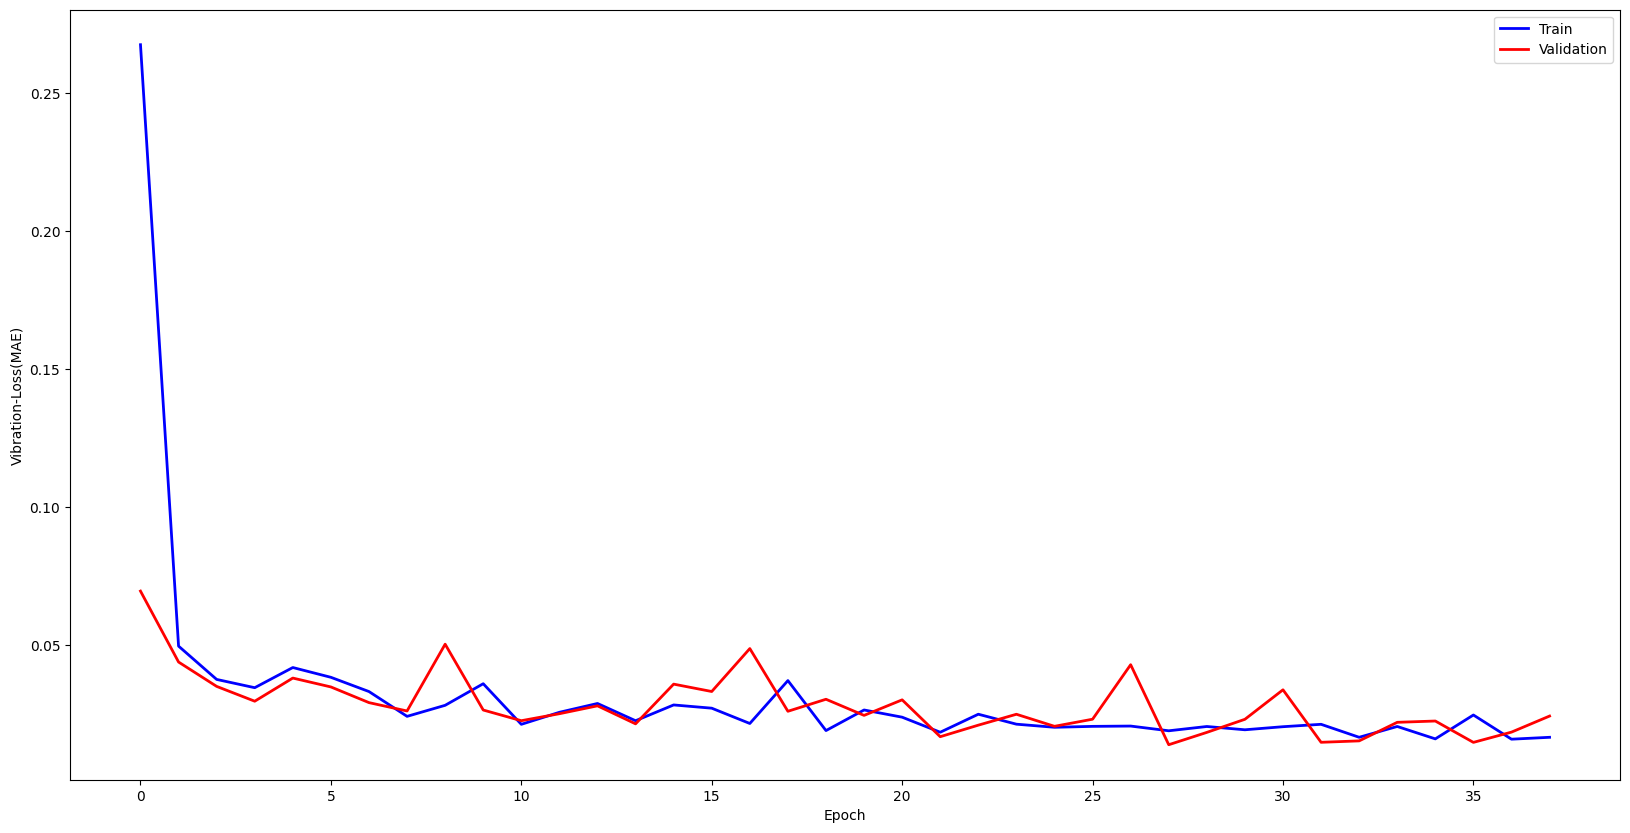

In [ ]:
plt.figure(figsize=(20,	10))
plt.plot(vib_history.history['loss'],	color='blue',	label='Train',	linewidth=2)
plt.plot(vib_history.history['val_loss'],	color='red',	label='Validation',	linewidth=2)
plt.ylabel('Vibration-Loss(MAE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

전류 데이터 학습 결과

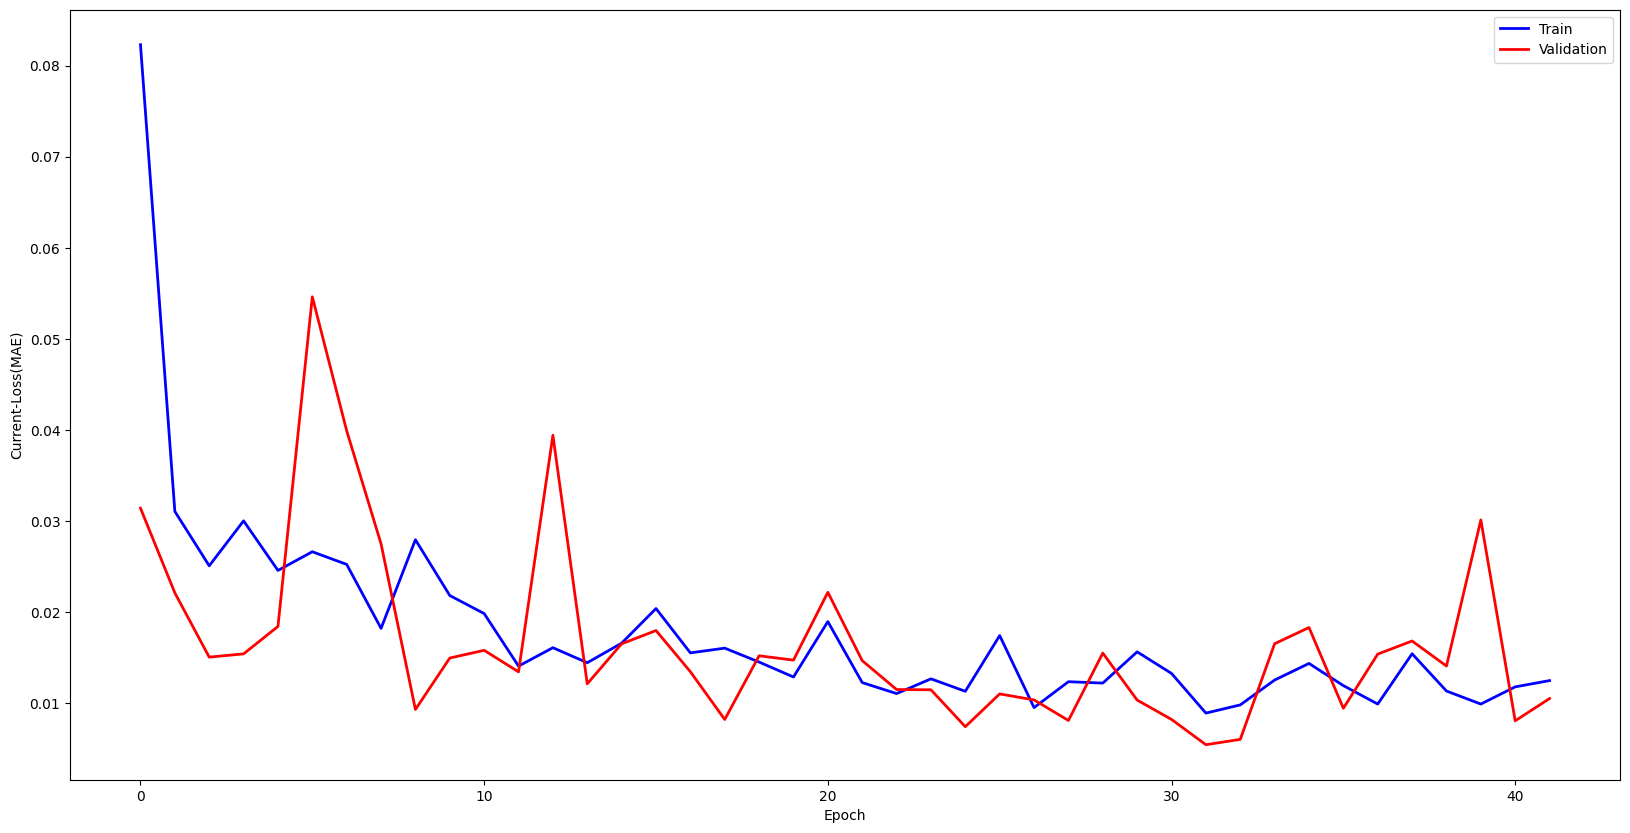

In [13]:
plt.figure(figsize=(20,	10))
plt.plot(cur_history.history['loss'],	color='blue',	label='Train',	linewidth=2)
plt.plot(cur_history.history['val_loss'],	color='red',	label='Validation',	linewidth=2)
plt.ylabel('Current-Loss(MAE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()